# Imports

In [37]:
import pandas             as pd
import numpy              as np
import seaborn            as sns
import inflection
import math
import datetime

from IPython.core.display import HTML
from matplotlib           import pyplot     as plt

## Helper Functions

In [2]:
def personal_settings():
    
    # plotly settings
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
        
    # notebook settings
    display(HTML('<style>.container{width:90% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)
        
    # seaborn settings
    sns.set(rc={'figure.figsize':(20,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.5)

In [15]:
personal_settings();

## Loading Data

In [16]:
df_sales_raw = pd.read_csv('../data/raw/train.csv', low_memory=False)
df_store_raw = pd.read_csv('../data/raw/store.csv', low_memory=False)

# merging datasets
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')
df_raw.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"


# DATA DESCRIPTION

In [44]:
df1=df_raw.copy()

## Renaming Columns

In [45]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [46]:
cols_old=['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
           'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
           'CompetitionDistance', 'CompetitionOpenSinceMonth',
           'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
           'Promo2SinceYear', 'PromoInterval']


# changing the name of the columns
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

# renaming dataset columns
df1.columns = cols_new
print(df1.columns)

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')


## Data Dimension

In [47]:
print('Number of rows: {}' .format(df1.shape[0]))
print('Number of columns: {}' .format(df1.shape[1]))

Number of rows: 1017209
Number of columns: 18


## Data Types

In [48]:
print(df1.dtypes)
df1.head(2)

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object


,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"


## Checking NA 

In [49]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## Filling Out NA

In [50]:
# analysing attributes with NA
df1[['store','date','competition_distance', 'competition_open_since_month', 'competition_open_since_year',
     'promo2', 'promo2_since_week', 'promo2_since_year', 'promo_interval']].sample(10).sort_values('date')

,store,date,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
985909,1035,2013-01-29,27150.00,NaN,NaN,0,NaN,NaN,NaN
937760,831,2013-03-13,800.00,6.00,2007.00,0,NaN,NaN,NaN
936073,259,2013-03-14,210.00,NaN,NaN,0,NaN,NaN,NaN
845858,359,2013-06-03,4370.00,NaN,NaN,0,NaN,NaN,NaN
720557,1053,2013-09-24,1710.00,7.00,2015.00,0,NaN,NaN,NaN
640132,908,2013-12-05,1980.00,7.00,2010.00,1,37.00,2009.00,"Jan,Apr,Jul,Oct"
619600,446,2013-12-23,340.00,10.00,2000.00,1,31.00,2013.00,"Feb,May,Aug,Nov"
370894,968,2014-08-10,1190.00,NaN,NaN,0,NaN,NaN,NaN
63116,677,2015-06-05,1740.00,6.00,2014.00,1,45.00,2009.00,"Feb,May,Aug,Nov"
59569,475,2015-06-08,140.00,9.00,2005.00,0,NaN,NaN,NaN


In [51]:
# ======= competition_distance

#checking maximum value
df1['competition_distance'].max() # The maximum distance is: 75860.0

# replacing each NA
df1['competition_distance'] = df1['competition_distance'].apply(lambda x:2000000.0 if math.isnan(x) else (x))

In [52]:
df1['date'] = pd.to_datetime(df1['date'])

#checking minimum value
df1['date'].min() # every store has a row with date 2013/01/01
fill_date = df1['date'].min() - datetime.timedelta(days=1)
fill_month = fill_date.month
fill_year = fill_date.year

# ======= competition_open_since_month
df1['competition_open_since_month'] = df1.apply(lambda x: fill_month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# ======= competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: fill_year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)

In [53]:
# ======= promo2_since_week
# ======= promo2_since_year
# ======= promo_interval

# 'promo2' is continuous promo, when 0 means that the store is not participating and 1 that the store is. 
# Therefore, if the store is not participating in 'promo2' there will be no data for 'promo2_since_week' and 'promo2_since_year'

# Checking NAs for 'promo2'==1
print("Checking NAs for stores participanting in promo2")
print('NAs for week:', df1[df1['promo2']==1]['promo2_since_week'].isna().sum())
print('NAs for year:', df1[df1['promo2']==1]['promo2_since_year'].isna().sum())
print('NAs for interval:',df1[df1['promo2']==1]['promo_interval'].isna().sum())

# Checking NAs for 'promo2'==0
print("\nChecking unique values for stores tha are NOT participanting in promo2")
print('Unique values for week:', df1[df1['promo2']==0]['promo2_since_week'].unique())
print('Unique values for year:',df1[df1['promo2']==0]['promo2_since_year'].unique())
print('Unique values for interval:',df1[df1['promo2']==0]['promo_interval'].unique())

print('\nData before:')
display(df1[['promo2','promo2_since_week', 'promo2_since_year', 'promo_interval']].sample(5))

# filling Na with "0"
df1['promo2_since_week'].fillna(0, inplace=True)
df1['promo2_since_year'].fillna(0, inplace=True)
df1['promo_interval'].fillna(0, inplace=True)

print('\nData after:')
display(df1[['promo2','promo2_since_week', 'promo2_since_year', 'promo_interval']].sample(5))

Checking NAs for stores participanting in promo2
NAs for week: 0
NAs for year: 0
NAs for interval: 0

Checking unique values for stores tha are NOT participanting in promo2
Unique values for week: [nan]
Unique values for year: [nan]
Unique values for interval: [nan]

Data before:


,promo2,promo2_since_week,promo2_since_year,promo_interval
267895,0,NaN,NaN,NaN
736906,1,45.00,2009.00,"Feb,May,Aug,Nov"
706763,0,NaN,NaN,NaN
824532,1,9.00,2011.00,"Mar,Jun,Sept,Dec"
68679,1,14.00,2011.00,"Jan,Apr,Jul,Oct"



Data after:


,promo2,promo2_since_week,promo2_since_year,promo_interval
194161,0,0.00,0.00,0
808835,0,0.00,0.00,0
287172,0,0.00,0.00,0
885697,1,27.00,2012.00,"Jan,Apr,Jul,Oct"
51263,0,0.00,0.00,0


In [54]:
# final check
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
dtype: int64

## Changing Variable Types

In [55]:
print(df1.dtypes)
df1.sample(5)

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object


,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval
471613,754,1,2014-05-05,11057,1171,1,1,0,0,c,c,380.00,5.00,2008.00,1,10.00,2014.00,"Mar,Jun,Sept,Dec"
762450,576,6,2013-08-17,6250,946,1,0,0,0,c,a,50.00,11.00,2006.00,0,0.00,0.00,0
678768,519,4,2013-10-31,4487,512,1,0,0,0,c,c,2510.00,8.00,2009.00,1,1.00,2012.00,"Jan,Apr,Jul,Oct"
847461,847,7,2013-06-02,0,0,0,0,0,0,c,c,190.00,12.00,2012.00,1,31.00,2013.00,"Feb,May,Aug,Nov"
850844,885,4,2013-05-30,0,0,0,1,a,0,a,a,480.00,12.00,2005.00,0,0.00,0.00,0


In [56]:
df1['competition_distance'] = df1['competition_distance'].astype(np.int64)
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(np.int64)
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(np.int64)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(np.int64)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(np.int64)

print(df1.dtypes)

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                     int64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
dtype: object


## Descriptive Statistical

In [57]:
num_df1 = df1.select_dtypes(include=['int64','float64'])
cat_df1 = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [58]:
# central tendendy - mean, median
ct1 = pd.DataFrame(num_df1.apply(np.mean)).T
ct2 = pd.DataFrame(num_df1.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_df1.apply(np.std)).T
d2 = pd.DataFrame(num_df1.apply(min)).T
d3 = pd.DataFrame(num_df1.apply(max)).T
d4 = pd.DataFrame(num_df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_df1.apply(lambda x: x.kurtosis)).T

# concatenate 
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1,1115,1114,558.43,558.00,321.91,-0.00,<bound method NDFrame._add_numeric_operations....
1,day_of_week,1,7,6,4.00,4.00,2.00,0.00,<bound method NDFrame._add_numeric_operations....
2,sales,0,41551,41551,5773.82,5744.00,3849.92,0.64,<bound method NDFrame._add_numeric_operations....
3,customers,0,7388,7388,633.15,609.00,464.41,1.60,<bound method NDFrame._add_numeric_operations....
4,open,0,1,1,0.83,1.00,0.38,-1.76,<bound method NDFrame._add_numeric_operations....
5,promo,0,1,1,0.38,0.00,0.49,0.49,<bound method NDFrame._add_numeric_operations....
6,school_holiday,0,1,1,0.18,0.00,0.38,1.68,<bound method NDFrame._add_numeric_operations....
7,competition_distance,20,2000000,1999980,10610.59,2330.00,101810.65,19.38,<bound method NDFrame._add_numeric_operations....
8,competition_open_since_month,1,12,11,8.74,10.00,3.46,-0.66,<bound method NDFrame._add_numeric_operations....
9,competition_open_since_year,1900,2015,115,2009.74,2012.00,5.18,-8.48,<bound method NDFrame._add_numeric_operations....


### Categorical Attributes

In [59]:
cat_df1.apply(lambda x: x.unique().shape[0])  

state_holiday     4
store_type        4
assortment        3
promo_interval    4
dtype: int64

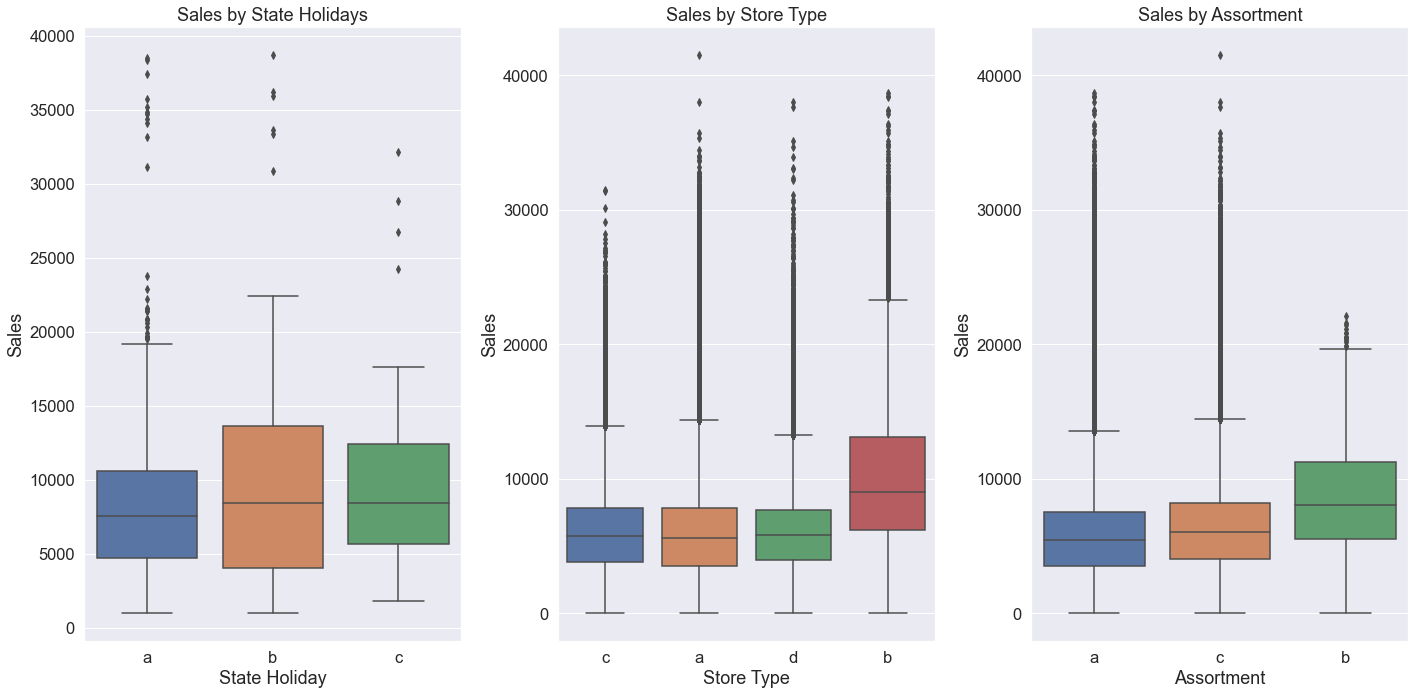

In [60]:
# checking sales by holidays, store type and assortment

aux1 = df1[(df1['state_holiday']!='0') & (df1['sales']>0)] # filtering sales that happened during a state holiday
plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux1).set(xlabel="State Holiday", ylabel="Sales", title="Sales by State Holidays");

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=df1).set(xlabel="Store Type", ylabel="Sales", title="Sales by Store Type");

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=df1).set(xlabel="Assortment", ylabel="Sales", title="Sales by Assortment");

plt.tight_layout()